# Good Software - analysis notebook 2
## Reproducting all panels for Figure 2

This notebook contains all Python code necessary to reproduce all panels from the Figure 2 of our paper.

**Github**: https://github.com/smangul1/good.software

**Manuscript**:
    
Inspired by Thiago Mosqueiro

### Importing Libraries

In [93]:
import pylab as pl
import numpy as np
import pandas as pd

### Importing and Parsing Data

In [366]:
data = pd.read_csv('/usability/usability_cleaned_data.csv')
data.head(100)

,Unnamed: 0,ID,Domain,Journal of Molecular Diagnostics,Year,Lapsed,Language,Update,Source,Source Control,...,Citations,Normalized citations,Releases,Error. Hard codding. Broken invalid link. Yes/No,Outdated Dependency,Commands,Commands Listed,Time To Install,Difficulty Status,Example Provided
0,1,mp1,mapping,Genome Biology,2009,10,C++,2017,Bioconda,Y,...,11226,1122.600000,30.0,N,N,1.0,1.0,5,2,Y
1,2,mp2,mapping,Bioinformatics,2013,6,C++,2017,Bioconda,Y,...,83,13.833333,36.0,N,N,1.0,1.0,5,2,Y
2,3,mp3,mapping,Bioinformatics,2012,7,C++,2014,Bioconda,N,...,36,5.142857,16.0,N,N,1.0,1.0,5,2,Y
3,4,mp4,mapping,Genome Biology,2004,15,C++,2017,Bioconda,N,...,2448,163.200000,7.0,N,N,1.0,1.0,5,2,Y
4,5,mp5,mapping,Bioinformatics,2009,10,C,2011,Bioconda,N,...,2474,247.400000,12.0,N,N,1.0,1.0,15,2,Y
5,6,mp6,mapping,PLOS Comp Bio,2009,10,C++,2012,Bioconda,N,...,572,57.200000,21.0,N,N,1.0,1.0,5,2,Y
6,7,mp7,mapping,Nature Genetics,2009,10,C,2014,Bioconda,N,...,603,60.300000,23.0,N,N,1.0,1.0,5,2,Y
7,8,mp8,mapping,Bioinformatics,2008,11,C,2008,Other,N,...,368,33.454545,23.0,N,N,3.0,3.0,5,2,Y
8,9,mp9,mapping,Genome Biology,2013,6,C++,2016,Other,N,...,41,6.833333,17.0,N,N,22.0,4.0,30,1,Y
9,10,mp10,mapping,Nature Methods,2015,4,C++,2017,Bioconda,Y,...,496,124.000000,7.0,Y,N,1.0,1.0,30,1,Y


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
Unnamed: 0                                          98 non-null int64
ID                                                  98 non-null object
Domain                                              98 non-null object
Journal of Molecular Diagnostics                    98 non-null object
Year                                                98 non-null int64
Lapsed                                              98 non-null int64
Language                                            91 non-null object
Update                                              88 non-null object
Source                                              98 non-null object
Source Control                                      98 non-null object
Reason                                              22 non-null object
Citations                                           98 non-null int64
Normalized citations                             

## FIGURE A: Comparing ??? Lets talk about this figure I think It could be a bit more straight forward

In [368]:
#TODO

## FIGURE B: Summary Pie Charts of the Data
### FIGURE B.1: Complex, Easy, and Not Installed

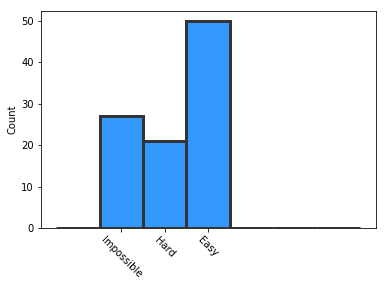

In [369]:
statuses = np.array(data["Difficulty Status"])


f, ax = pl.subplots(1, 1)
ax.hist(statuses, np.arange(-1.5,6,1), edgecolor=(0.2,0.2,0.2), lw=3, 
            color=(0.2,0.6,1.0))

ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels( ['Impossible', 'Hard', 'Easy'], rotation=-45 )

pl.show()

In [370]:
#Lets get clean some data for a piechart regarding if Example is Provided
dif_status = data.groupby(['Difficulty Status',]).size()
dif_status.head()

Difficulty Status
0    27
1    21
2    50
dtype: int64

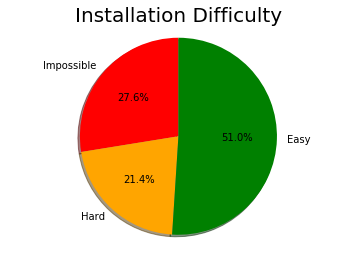

In [371]:

labels = ['Impossible', 'Hard', 'Easy']
sizes = [dif_status[0], dif_status[1], dif_status[2]]
values = ['red', 'orange', 'green']
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Installation Difficulty", fontsize=20)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()

### FIGURE B.2: Automatic Installation Test??

In [372]:
#TODO

### FIGURE B.3: Example Provided

In [373]:
#Lets get clean some data for a piechart regarding if Example is Provided
ex_prov_pie = data.groupby(['Example Provided',]).size()
print ex_prov_pie

Example Provided
N    31
Y    67
dtype: int64


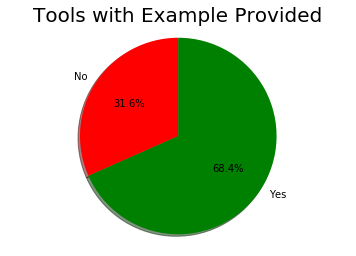

In [374]:
labels = ['No', 'Yes']
sizes = [ex_prov_pie[0], ex_prov_pie[1]]
values = ['red', 'green']
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Tools with Example Provided", fontsize=20)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()

## FIGURE C: Statistical Significance of Citations based on Difficulty of Installation

### Update Dependencies for Statistical significance, math (for standard error)

In [375]:
from scipy import stats
import matplotlib.pyplot as plt
import math

### Clean Column Names for Filtering

In [376]:

data.columns = [c.replace(' ', '_') for c in data.columns]
print data.columns

Index([u'Unnamed:_0', u'ID', u'Domain', u'Journal_of_Molecular_Diagnostics',
       u'Year', u'Lapsed_', u'Language', u'Update', u'Source_',
       u'Source_Control', u'Reason', u'Citations', u'Normalized_citations',
       u'Releases', u'Error._Hard_codding._Broken_invalid_link._Yes/No',
       u'Outdated_Dependency', u'Commands', u'Commands_Listed',
       u'Time_To_Install', u'Difficulty_Status', u'Example_Provided'],
      dtype='object')


In [377]:
#Lets get clean some data to get sums for the number of citations
dif_status_mean = data.groupby(['Difficulty_Status',]).mean()
dif_status_std = data.groupby(['Difficulty_Status',]).std()
dif_status_size = data.groupby(['Difficulty_Status',]).size()
dif_status_sum = data.groupby(['Difficulty_Status',]).sum()
dif_status_mean.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install
Difficulty_Status,,,,,,,,,
0,65.592593,2012.259259,6.740741,81.000000,10.385391,8.777778,18.866667,6.555556,82.222222
1,40.619048,2013.142857,5.857143,672.095238,89.462642,6.000000,12.350000,4.470588,78.571429
2,46.060000,2012.060000,6.940000,1061.100000,108.689726,14.181818,2.833333,2.760870,7.800000


In [378]:
dif_status_std.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install
Difficulty_Status,,,,,,,,,
0,21.175565,2.263296,2.263296,96.218102,11.287159,14.069273,47.485136,6.563914,50.617976
1,29.761512,1.878449,1.878449,2056.765663,229.439292,7.848567,12.145066,3.356293,41.867137
2,29.122829,2.951375,2.951375,2857.206065,287.123460,15.042553,2.754751,2.822015,4.535574


In [379]:
# Custom function to draw the diff bars
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':25,'shrinkB':25,'linewidth':1.5}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

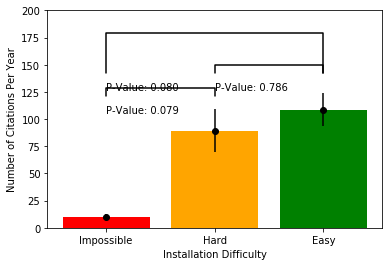

In [410]:
colors = ('red', 'orange', 'green')
std     = [i for i in dif_status_std["Normalized_citations"]]
means   = [i for i in dif_status_mean["Normalized_citations"]]
ns = [i for i in dif_status_size]

ind  = np.arange(3)    # the x locations for the groups
width= 0.7
labels = ('Impossible', 'Hard', 'Easy')

# Pull the formatting out here
bar_kwargs = {'width':width, 'color':'y', 'linewidth':2, 'zorder':5}
err_kwargs = {'zorder':0, 'fmt':None, 'linewidth':2, 'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

# Impossible vs Hard 
p_value = stats.ttest_ind(data[(data.Difficulty_Status==0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==1)].Normalized_citations.tolist())
label_diff(0,1, 'P-Value: %.3f' %(p_value[1]), ind, means)

# Hard vs Easy
p_value = stats.ttest_ind(data[(data.Difficulty_Status==1)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
label_diff(1,2,'P-Value: %.3f' %(p_value[1]), ind, means)

# Easy vs Impossible
p_value = stats.ttest_ind(data[(data.Difficulty_Status==0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
label_diff(0,2,'P-Value: %.3f' %(p_value[1]), ind, means)


plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Installation Difficulty")
plt.xticks(ind, labels, color='k')
plt.show()

## FIGURE D: TODO Not sure what is considered a pass and a fail for automtatic installation

## FIGURE E: Effect of Bioconda Package Manger on Installation Time

In [441]:
## TODO Be sure No = all other groups besides Other and Bioconda

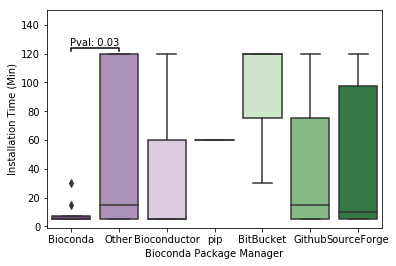

In [383]:
import seaborn as sns
sns.boxplot(x="Source_", y="Time_To_Install", data=data, palette="PRGn")

# statistical annotation
# x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
# y, h, col = data['Time_To_Install'].max() + 2, 2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# #TODO run stats
# plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = data['Time_To_Install'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ttest_ind(data[(data.Source_=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.Source_=='Other')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, 'Pval: %.2f'%(p_value[1]), ha='center', va='bottom', color=col)

plt.ylim(ymax=150) 
plt.xlabel("Bioconda Package Manager")
plt.ylabel("Installation Time (Min)")
plt.show()

## FIGURE F: Portion of Undocumented Commands Compared to Difficulty Status

In [428]:
data.head(10)

,Unnamed:_0,ID,Domain,Journal_of_Molecular_Diagnostics,Year,Lapsed_,Language,Update,Source_,Source_Control,...,Normalized_citations,Releases,Error._Hard_codding._Broken_invalid_link._Yes/No,Outdated_Dependency,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Example_Provided,Portion_Undocumented
0,1,mp1,mapping,Genome Biology,2009,10,C++,2017,Bioconda,Y,...,1122.600000,30.0,N,N,1.0,1.0,5,2,Y,0.000000
1,2,mp2,mapping,Bioinformatics,2013,6,C++,2017,Bioconda,Y,...,13.833333,36.0,N,N,1.0,1.0,5,2,Y,0.000000
2,3,mp3,mapping,Bioinformatics,2012,7,C++,2014,Bioconda,N,...,5.142857,16.0,N,N,1.0,1.0,5,2,Y,0.000000
3,4,mp4,mapping,Genome Biology,2004,15,C++,2017,Bioconda,N,...,163.200000,7.0,N,N,1.0,1.0,5,2,Y,0.000000
4,5,mp5,mapping,Bioinformatics,2009,10,C,2011,Bioconda,N,...,247.400000,12.0,N,N,1.0,1.0,15,2,Y,0.000000
5,6,mp6,mapping,PLOS Comp Bio,2009,10,C++,2012,Bioconda,N,...,57.200000,21.0,N,N,1.0,1.0,5,2,Y,0.000000
6,7,mp7,mapping,Nature Genetics,2009,10,C,2014,Bioconda,N,...,60.300000,23.0,N,N,1.0,1.0,5,2,Y,0.000000
7,8,mp8,mapping,Bioinformatics,2008,11,C,2008,Other,N,...,33.454545,23.0,N,N,3.0,3.0,5,2,Y,0.000000
8,9,mp9,mapping,Genome Biology,2013,6,C++,2016,Other,N,...,6.833333,17.0,N,N,22.0,4.0,30,1,Y,0.692308
9,10,mp10,mapping,Nature Methods,2015,4,C++,2017,Bioconda,Y,...,124.000000,7.0,Y,N,1.0,1.0,30,1,Y,0.000000


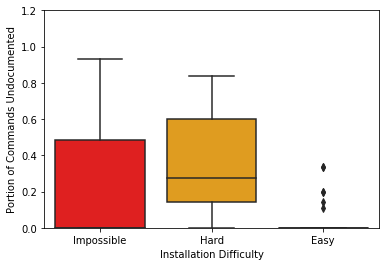

In [429]:
data["Portion_Undocumented"] = (data["Commands"]-data["Commands_Listed"])/(data["Commands"] + data["Commands_Listed"])
sns.boxplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=['red', 'orange', 'green'])

# statistical annotation
# x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
# y, h, col = data['Time_To_Install'].max() + 2, 2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# #TODO run stats
# plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 0, 1
y, h, col = data['Portion_Undocumented'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)


# plt.text((x1+x2)*.5, y+h, 'Pval: %.2f'%(0.20000), ha='center', va='bottom', color=col)

plt.ylim(ymax=1.2) 
plt.ylim(ymin=0) 
plt.xlabel("Installation Difficulty")
plt.ylabel("Portion of Commands Undocumented")
plt.xticks(ind, labels, color='k')
plt.show()

In [430]:
#Impossible vs Hard
p_value = stats.ttest_ind(data[(data.Difficulty_Status==0) & (data.Portion_Undocumented!=None)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==1) & (data.Portion_Undocumented!=None)].Portion_Undocumented.tolist())
print p_value[1]

nan


## FIGURE NEW: Suggested by Serghei to see if statistical significance between citations based on example provided

In [445]:
#Lets get clean some data to get sums for the number of citations
ex_status_mean = data.groupby(['Example_Provided',]).mean()
ex_status_std = data.groupby(['Example_Provided',]).std()
ex_status_size = data.groupby(['Example_Provided',]).size()
ex_status_sum = data.groupby(['Example_Provided',]).sum()
ex_status_mean.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Portion_Undocumented
Example_Provided,,,,,,,,,,,
N,67.806452,2012.516129,6.483871,122.225806,15.794278,5.142857,4.863636,3.631579,48.387097,1.193548,0.067302
Y,42.164179,2012.268657,6.731343,978.611940,106.029622,12.543478,9.163934,4.064516,41.194030,1.253731,0.147236


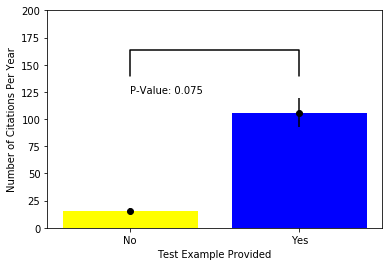

In [446]:
colors = ('yellow', 'blue')
std     = [i for i in ex_status_std["Normalized_citations"]]
means   = [i for i in ex_status_mean["Normalized_citations"]]
ns = [i for i in ex_status_size]

ind  = np.arange(2)    # the x locations for the groups
width= 0.7
labels = ('No', 'Yes')

# Pull the formatting out here
bar_kwargs = {'width':width, 'color':'y', 'linewidth':2, 'zorder':5}
err_kwargs = {'zorder':0, 'fmt':None, 'linewidth':2, 'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

p_value = stats.ttest_ind(data[(data.Example_Provided=='Y')].Normalized_citations.tolist(),
                         data[(data.Example_Provided=='N')].Normalized_citations.tolist())
label_diff(0,1, 'P-Value: %.3f' %(p_value[1]), ind, means)


plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Test Example Provided")
plt.xticks(ind, labels, color='k')
plt.show()